In [1]:
# import Library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data Collection and Processing

In [2]:
# Loading the dataset:
df=pd.read_csv('loan_prediction.csv')

In [3]:
# showing 5 raws of data:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Number of rows and columns
df.shape

(614, 13)

In [5]:
# information about full data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# checking the missing values:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Dropping the missing values from data:
df=df.dropna()

In [9]:
# checking the missing values:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Describe the data:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [11]:
# label encoding:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])
df['Loan_Status'].unique()

array([0, 1])

In [12]:
# showing 5 raws of data:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# Data Count values:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
# Here cheking Dependents values from data:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
# Replacing the values of 3+ to 4..
df=df.replace(to_replace='3+',value=4)

In [16]:
# Here cheking Dependents values from data:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

#### Data Visualization:

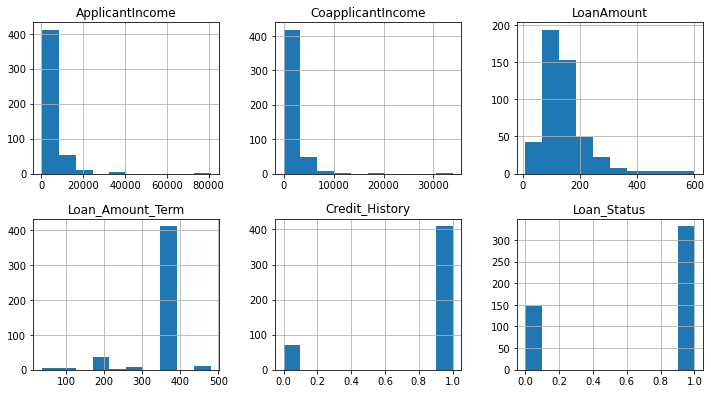

In [17]:
# display histogram:
df.hist(figsize=(12,10), layout=(3,3), sharex=False);

<AxesSubplot:xlabel='Education', ylabel='count'>

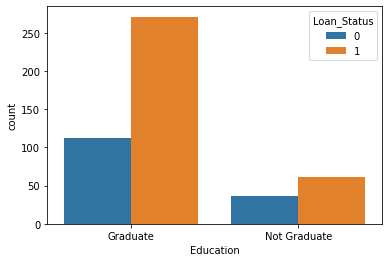

In [18]:
# Display the Education and Loan_Status:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

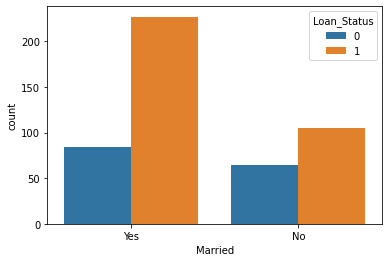

In [19]:
# Display the Married and Loan_Status:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

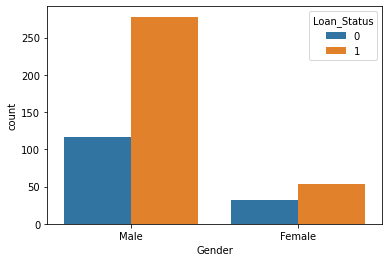

In [20]:
# Display the Gender and Loan_Status:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

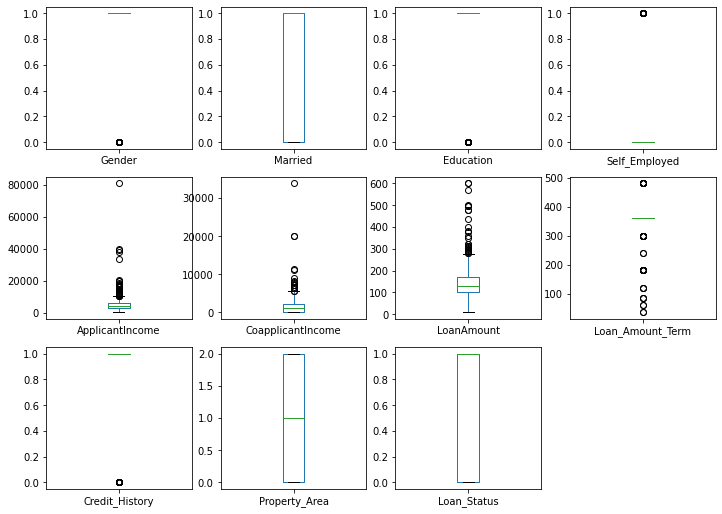

In [48]:
# display Boxplot:
df.plot(kind='box', figsize=(12,12), layout=(4,4), sharex=False, subplots=True);

In [21]:
# Convert categoriacl columns to numerical values:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
           'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [22]:
# showing 5 raws of data:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


### Data Correlation:

In [23]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,-0.059245,-0.001652,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.055005,0.068437
Self_Employed,-0.002761,0.015674,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


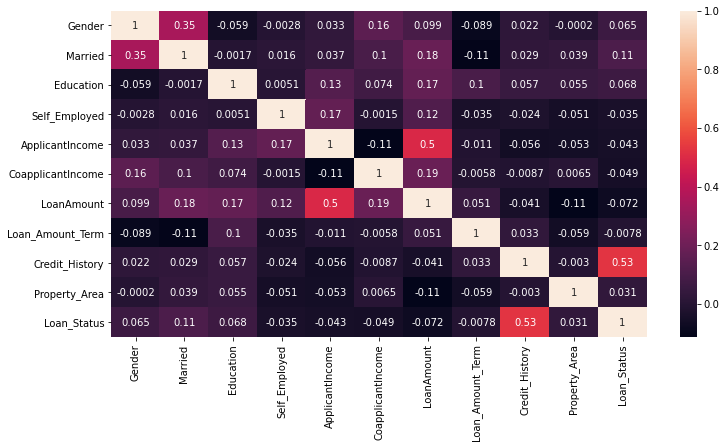

In [24]:
# display heatmap:
plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True);

In [25]:
# Seperating  the data and label:
X=df.drop(columns=['Loan_ID','loan_prediction.csvStatus'],axis=1)
Y=df['Loan_Status']

In [26]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

#### Split datasets into train and test

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


#### Creating Model:

In [29]:
#support vector machine model: 
from sklearn import svm
classifier=svm.SVC(kernel='linear')    

In [30]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, Y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, Y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, Y_test)))

Acc on training data: 1.000
Acc on test data: 0.781


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( max_depth=3)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
# acc_clf = round(clf.score(X_train, y_train) * 100, 2)
acc_clf = round(metrics.accuracy_score(Y_test, Y_pred) * 100, 2)
print("Acc on:",metrics.accuracy_score(Y_test, Y_pred))

Acc on: 0.7916666666666666


### Model Evaluation:

In [34]:
# Here finding Accuracy on Training data:
from sklearn.metrics import accuracy_score
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 0.7994791666666666


In [35]:
# Here finding Accuracy on Test data:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.7916666666666666


In [36]:
# DecisionTree the data:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
preddt=dt.predict(X_test)
print('Accuracy',accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

Accuracy 64.58333333333334
[[20 10]
 [24 42]]
              precision    recall  f1-score   support

           0       0.45      0.67      0.54        30
           1       0.81      0.64      0.71        66

    accuracy                           0.65        96
   macro avg       0.63      0.65      0.63        96
weighted avg       0.70      0.65      0.66        96



In [37]:
# Creating the hyperparameter grid:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
c_space = np.logspace(-5, 5, 8)
param_grid = {'C': c_space}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X,Y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 100000.0}
Best score is 0.8


In [43]:
# Using RandomForestClassifier :
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [44]:
ypred = model.predict(X_test)

In [45]:
print(ypred)

[1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1]


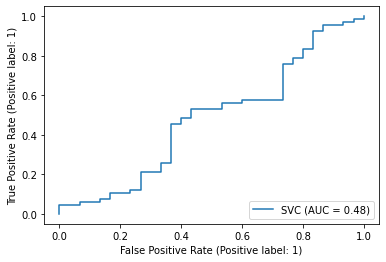

In [41]:
# here ploting roc_curve :
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, Y_train)
metrics.plot_roc_curve(clf, X_test, Y_test) 
plt.show()

In [42]:
# save the model:
import pickle
file = 'Loan Application Status'
#save file
save = pickle.dump(model,open(file,'wb'))